In [2]:
import cvxpy as cp

# Define the decision variables
x1 = cp.Variable(nonneg=True)
x2 = cp.Variable(nonneg=True)

# Objective function
objective = cp.Maximize(3 * x1 + 5 * x2)

# Constraints
constraints = [
    x1 + 2 * x2 <= 8,
    3 * x1 + 2 * x2 <= 12,
]

# Define and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()  # Alternatively, use solver=cp.GUROBI or cp.SCIPY

# Output the results
print("Optimal value of z:", problem.value)
print("Optimal x1:", x1.value)
print("Optimal x2:", x2.value)


Optimal value of z: 20.999999993729446
Optimal x1: 1.9999999952064256
Optimal x2: 3.000000001622034


In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define the problem
c = np.array([[0], [1]])  # Coefficients of the objective function
A = np.array([
    [1, 0],
    [0.1, 1],
    [0.1, -1]
])  # Coefficients of constraints
b = np.array([[1], [1], [0]])  # Bounds for constraints

# Define decision variables
x = cp.Variable((2,), nonneg=True)

# Objective function
objective = cp.Maximize(c.T @ x)

# Constraints
constraints = [A @ x <= b]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Print the results
print("Optimal value of z:", problem.value)
print("Optimal x1:", x.value[0])
print("Optimal x2:", x.value[1])


Optimal value of z: 0.9999999994143821
Optimal x1: 3.0271733760297466e-09
Optimal x2: 0.9999999994143821


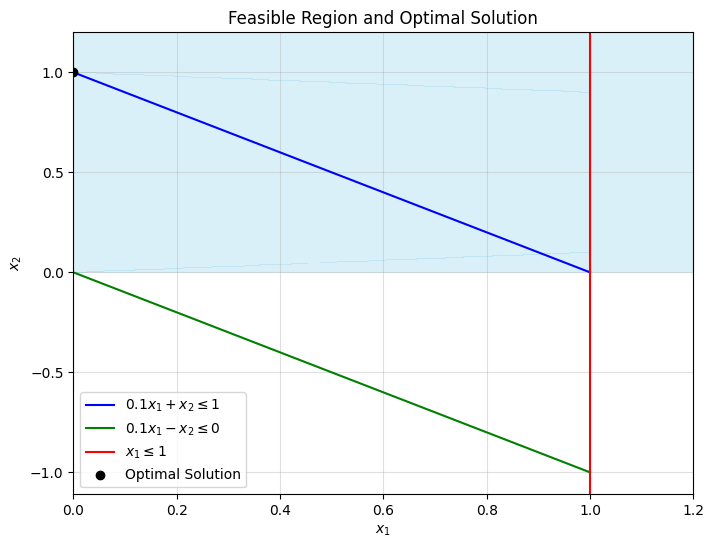

In [4]:
# Visualization of the feasible region and solution
x1 = np.linspace(0, 1.2, 400)
x2 = np.linspace(0, 1.2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Feasibility constraints
feasibility = (X1 <= 1) & (0.1 * X1 + X2 <= 1) & (0.1 * X1 - X2 <= 0)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, feasibility, alpha=0.3, colors=["skyblue"])
plt.plot([0, 1], [1, 0], label=r"$0.1 x_1 + x_2 \leq 1$", color="blue")
plt.plot([0, 1], [0, -1], label=r"$0.1 x_1 - x_2 \leq 0$", color="green")
plt.axvline(1, color="red", label=r"$x_1 \leq 1$")
plt.scatter(x.value[0], x.value[1], color="black", label="Optimal Solution", zorder=5)
plt.title("Feasible Region and Optimal Solution")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(alpha=0.4)
plt.show()
